# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 3/25/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 3/25/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1347,38928341,3.5
Albania,766,2877800,26.6
Algeria,221,43851043,0.5
Andorra,919,77265,1189.4
Angola,247,32866268,0.8
Antarctica,0,0,NaN
Antigua and Barbuda,16,97928,16.3
Argentina,56602,45195777,125.2
Armenia,581,2963234,19.6


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
"Korea, South",5291434,51269183,10320.9
Austria,593601,9006400,6590.9
Iceland,19852,341250,5817.4
Liechtenstein,2100,38137,5506.5
Brunei,22901,437483,5234.7
New Zealand,240901,4822233,4995.6
Cyprus,52658,1207361,4361.4
Switzerland,346791,8654618,4007.0
Netherlands,646280,17134873,3771.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/21/22    18810035.0
3/22/22    19058757.0
3/23/22    19217142.0
3/24/22    19365628.0
3/25/22    19487710.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

3/12/22         NaN
3/13/22     73343.0
3/14/22    198955.0
3/15/22    262283.0
3/16/22    294924.0
3/17/22    297850.0
3/18/22    260237.0
3/19/22    131725.0
3/20/22     92316.0
3/21/22        37.0
3/22/22    248722.0
3/23/22    158385.0
3/24/22    148486.0
3/25/22    122082.0
Name: Germany, dtype: float64

<AxesSubplot:>

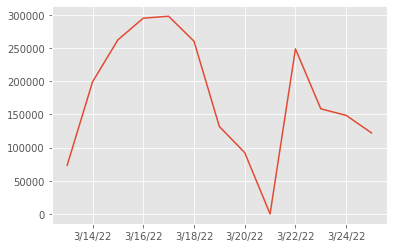

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2753.1046197313067